In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
tspa_raw_df = pd.read_csv("../../raw_data/TSPA.csv",  header=None)
tspb_raw_df = pd.read_csv("../../raw_data/TSPB.csv",  header=None)

# Instance A

In [4]:
experiment_summary_a_greedy = pd.read_csv("../Results/GreedyHeuristics/TSPA/experiment_summary.csv")
experiment_summary_a_greedy_regret = pd.read_csv("../Results/GreedyRegretHeuristics/TSPA/experiment_summary.csv")

In [6]:
experiment_summary_a_greedy


,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPA,RandomSolution,226377,288217,264499.24,200,15
1,TSPA,NearestNeighborEndOnly,89198,120393,103411.57,200,25
2,TSPA,NearestNeighborAllPositions,71488,74410,72653.55,200,4
3,TSPA,GreedyCycle,71719,74410,72721.72,200,124


In [7]:
experiment_summary_a_greedy_regret

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPA,greedy2RegretNearest,105692,126860,115400.24,200,197
1,TSPA,greedyWeightedRegret,71108,73395,72135.82,200,1


In [8]:
experiment_summary_a_combined = pd.concat([experiment_summary_a_greedy, experiment_summary_a_greedy_regret], ignore_index=True)

In [9]:
experiment_summary_a_combined

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPA,RandomSolution,226377,288217,264499.24,200,15
1,TSPA,NearestNeighborEndOnly,89198,120393,103411.57,200,25
2,TSPA,NearestNeighborAllPositions,71488,74410,72653.55,200,4
3,TSPA,GreedyCycle,71719,74410,72721.72,200,124
4,TSPA,greedy2RegretNearest,105692,126860,115400.24,200,197
5,TSPA,greedyWeightedRegret,71108,73395,72135.82,200,1


In [16]:
def load_solution(instance_name,method, solution_id):
    file_path_1 = f"../Results/GreedyRegretHeuristics/{instance_name}/{instance_name}_{method}_solutions.csv"
    file_path_2 = f"../Results/GreedyHeuristics/{instance_name}/{instance_name}_{method}_solutions.csv"
    if os.path.exists(file_path_1) or os.path.exists(file_path_2):
        df = pd.read_csv(file_path_1) if os.path.exists(file_path_1) else pd.read_csv(file_path_2)
        return df[df['SolutionID'] == solution_id]
    else:
        print(f"File {file_path_1} or {file_path_2} does not exist.")
        return None

In [17]:
solutions_A = pd.DataFrame()
for method in experiment_summary_a_combined['Method'].unique():
    method_data = experiment_summary_a_combined[experiment_summary_a_combined['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution("TSPA", method, best_solution_id)
    solutions_A = pd.concat([solutions_A, solution], ignore_index=True)

solutions_A

RandomSolution: Best Solution ID = 15
NearestNeighborEndOnly: Best Solution ID = 25
NearestNeighborAllPositions: Best Solution ID = 4
GreedyCycle: Best Solution ID = 124
greedy2RegretNearest: Best Solution ID = 197
greedyWeightedRegret: Best Solution ID = 1


,SolutionID,TotalCost,NumNodes,TotalDistance,ObjectiveFunction,Cycle
0,15,226377,100,139003,365380,114-96-146-59-137-140-2-13-57-94-18-177-113-80...
1,25,89198,100,31967,121165,12-94-63-176-80-79-53-180-154-135-133-151-59-5...
2,4,71488,100,23578,95066,117-0-46-68-139-193-41-115-5-42-181-159-69-108...
3,124,71719,100,24005,95724,93-0-46-68-139-193-41-115-5-42-181-159-69-108-...
4,197,105692,100,22266,127958,196-157-188-113-171-16-78-25-44-120-82-129-92-...
5,1,71108,100,22981,94089,0-46-68-139-193-41-115-5-42-181-159-69-108-18-...


In [41]:
for i, cycle in enumerate(solutions_A['Cycle']):
    print(f"Solution {i}: {cycle}")

Solution 0: 114-96-146-59-137-140-2-13-57-94-18-177-113-80-122-190-125-194-118-99-145-83-127-55-193-84-151-67-115-184-15-167-28-149-198-70-26-27-77-163-189-47-108-136-181-135-5-1-179-43-100-152-53-150-36-119-175-8-63-176-45-104-34-192-162-116-0-180-31-106-73-90-187-4-169-79-172-74-40-81-131-65-139-51-130-41-195-85-165-196-58-183-52-38-173-124-133-46-128-142
Solution 1: 12-94-63-176-80-79-53-180-154-135-133-151-59-51-137-148-62-49-144-14-106-178-185-40-165-52-55-152-97-1-101-86-75-120-2-124-167-9-15-183-89-23-186-114-37-102-57-92-78-145-129-44-25-16-171-175-113-31-179-26-100-121-189-122-162-123-65-116-115-139-193-41-42-43-118-46-0-143-117-68-93-140-18-22-160-184-149-131-127-70-158-136-182-19-130-111-128-3-138-32
Solution 2: 117-0-46-68-139-193-41-115-5-42-181-159-69-108-18-22-146-34-160-48-54-30-177-10-190-4-112-84-35-184-43-116-65-59-118-51-151-133-162-123-127-70-135-180-154-53-100-26-86-75-44-25-16-171-175-113-56-31-78-145-179-92-57-52-185-119-40-196-81-90-165-106-178-14-144-62-9-148-

In [18]:
coords = tspa_raw_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)

In [27]:
def plot_solution(instance, method, solution_data):
    """
    Plot a TSP solution showing the cycle and nodes.
    
    Parameters:
    instance: str - 'TSPA' or 'TSPB'
    method: str - Method name or 'Checker'
    solution_data: dict or pandas.Series - Solution data containing cycle information
    """
    if instance == 'TSPA':
        df = tspa_raw_df
    else: 
        df = tspb_raw_df
    
    coords = df.iloc[:, 0].str.split(';', expand=True)
    x_coords = coords[0].astype(int)
    y_coords = coords[1].astype(int)
    costs = coords[2].astype(int)
    
    if isinstance(solution_data, dict):
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    else: 
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    
    cycle_nodes = [int(x) for x in cycle_str.split('-')]
    
    highlight_x = x_coords[cycle_nodes]
    highlight_y = y_coords[cycle_nodes]
    
    plt.figure(figsize=(14, 10))
    
    unselected_mask = ~x_coords.index.isin(cycle_nodes)
    plt.scatter(x_coords[unselected_mask], y_coords[unselected_mask], 
               alpha=0.8, s=20, color='gray', label='Unselected nodes')
    
    selected_costs = costs[cycle_nodes]
    scatter = plt.scatter(highlight_x, highlight_y, 
                         c=selected_costs, cmap='Greens', 
                         alpha=0.9, s=50, label='Selected nodes (100)',
                         edgecolors='black', linewidths=0.5)
    
    first_node_idx = cycle_nodes[0]
    plt.scatter(x_coords[first_node_idx], y_coords[first_node_idx], 
               c=costs[first_node_idx], cmap='Greens', 
               alpha=0.9, s=50,
               edgecolors='red', linewidths=2)
    
    # Add cost labels for selected nodes
    for node_idx in cycle_nodes:
        plt.annotate(str(costs[node_idx]), 
                    (x_coords[node_idx], y_coords[node_idx]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    for j in range(len(cycle_nodes)):
        current_node = cycle_nodes[j]
        next_node = cycle_nodes[(j + 1) % len(cycle_nodes)] 
        
        plt.plot([x_coords[current_node], x_coords[next_node]], 
                 [y_coords[current_node], y_coords[next_node]], 
                 'b-', alpha=0.4, linewidth=0.8)
    
    plt.colorbar(scatter, label='Node Cost')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{instance} Dataset - {method} Solution\n'
              f'Objective: {objective}, '
              f'Cost: {total_cost}, '
              f'Distance: {total_distance}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


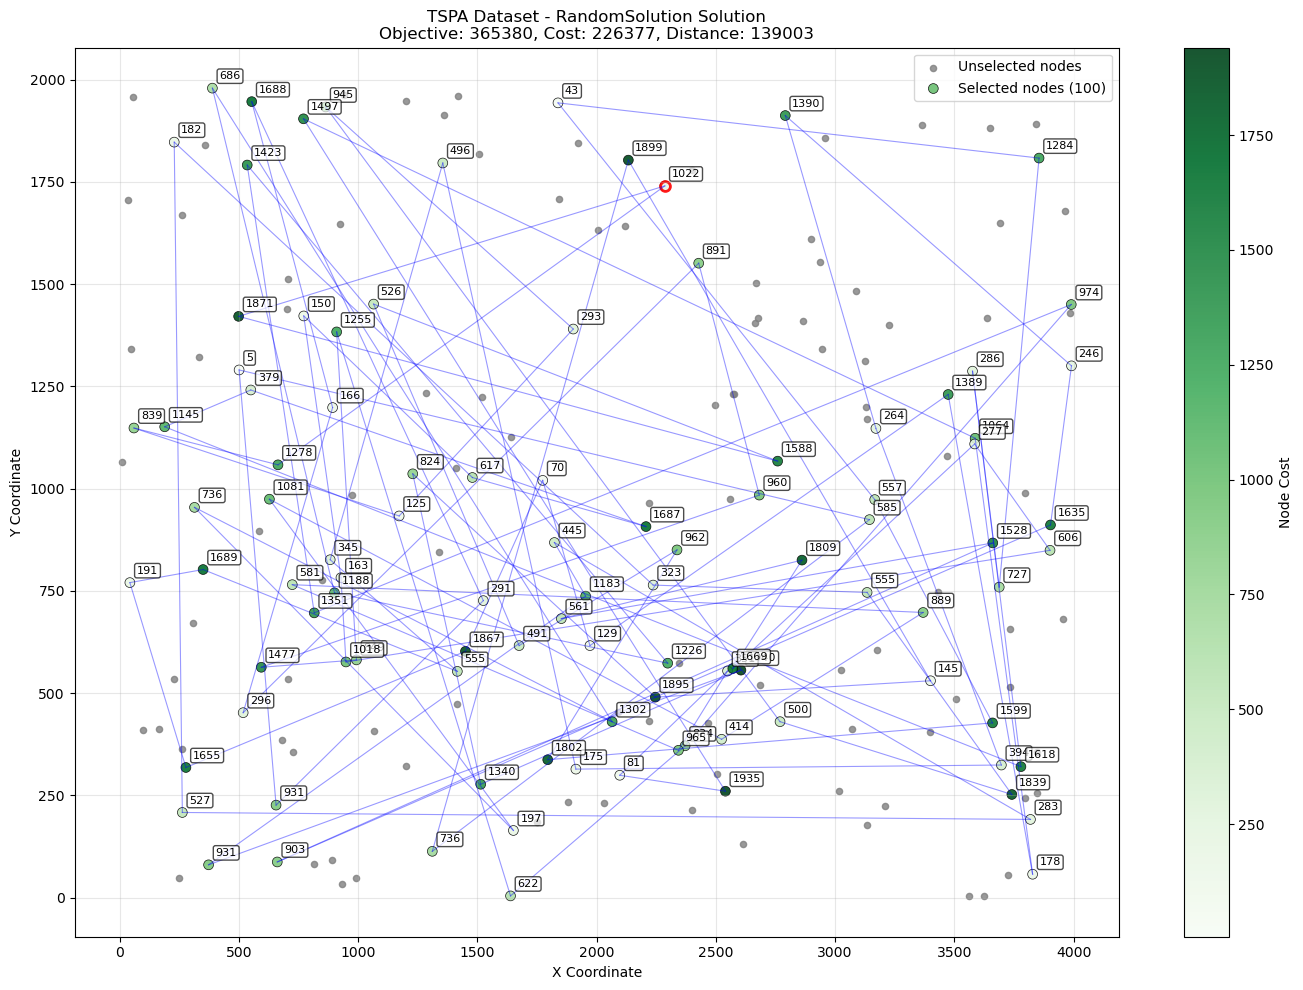

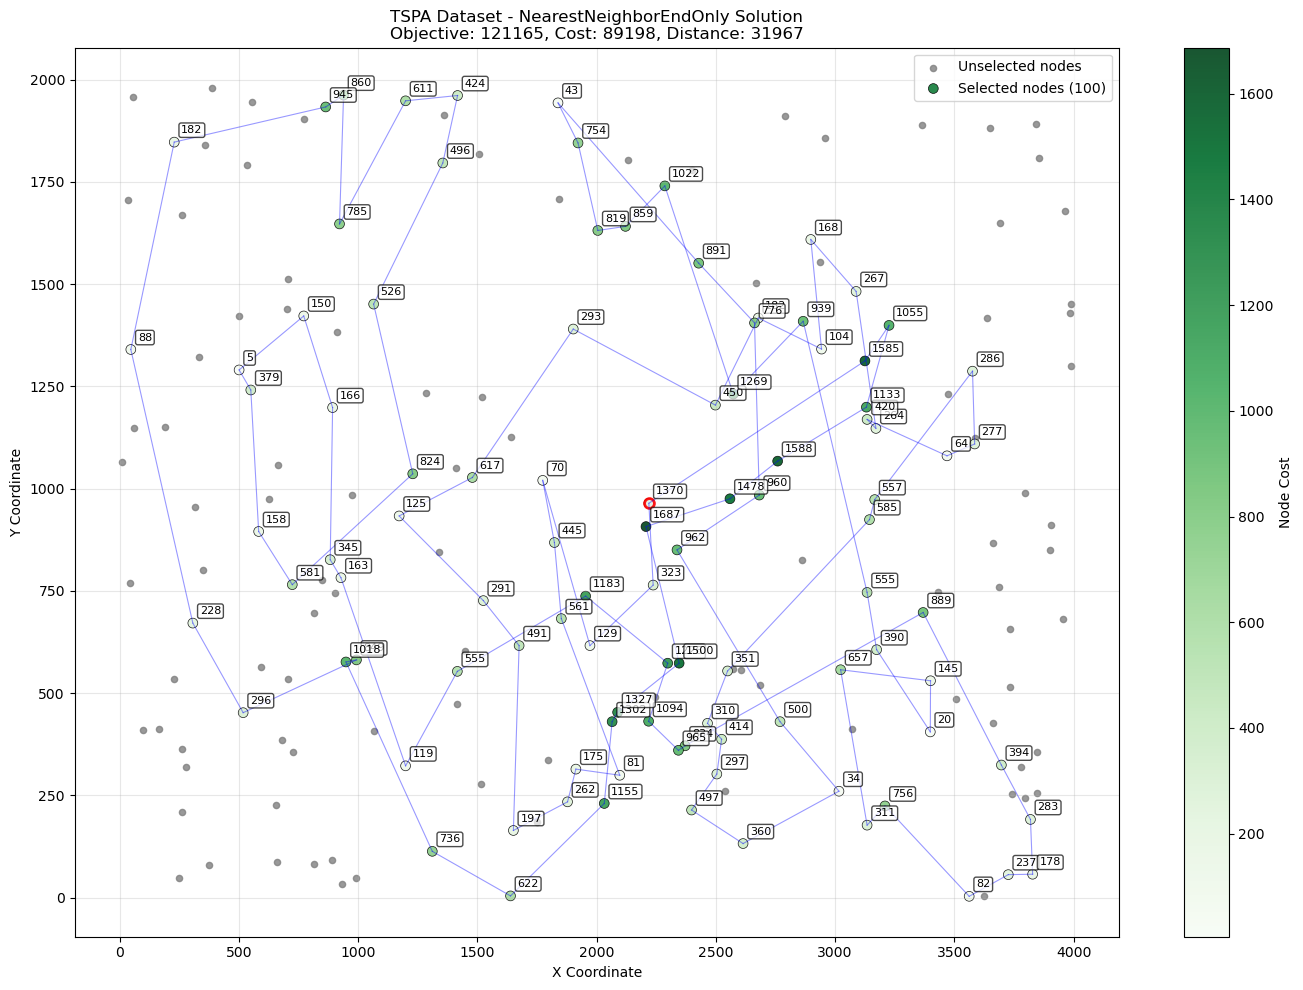

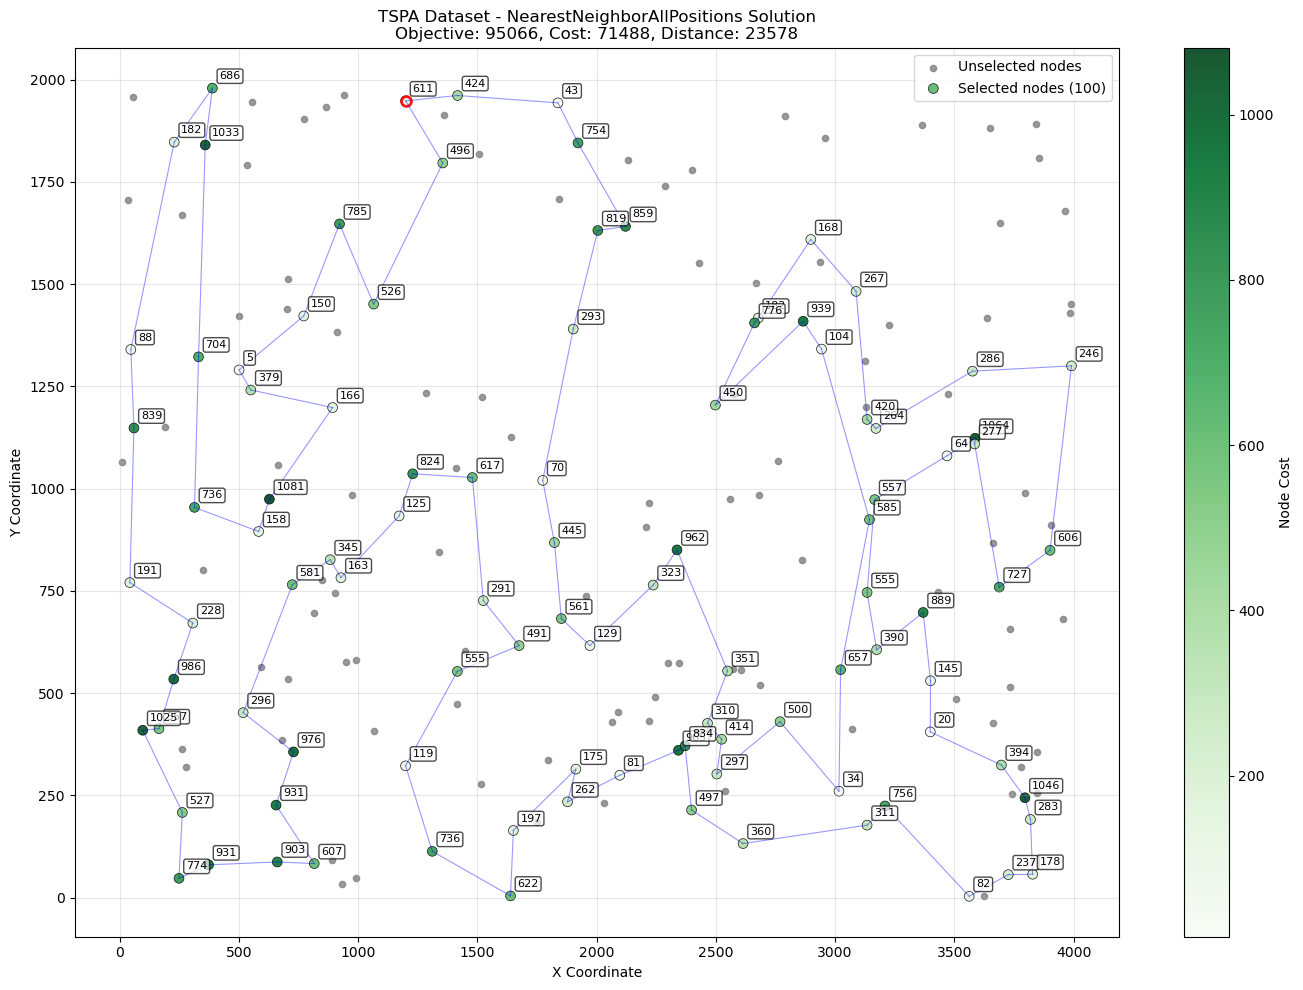

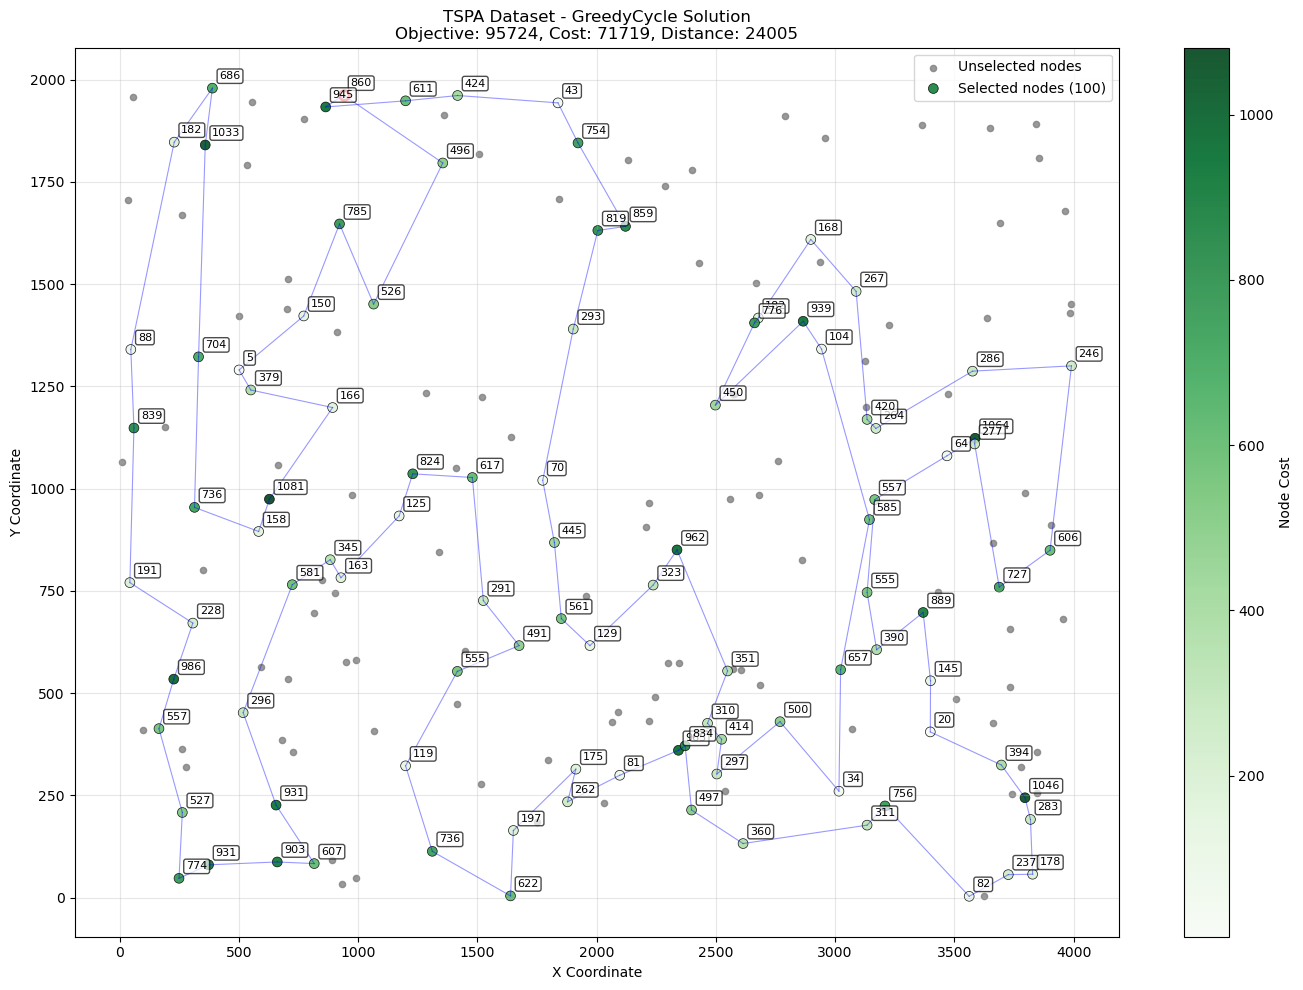

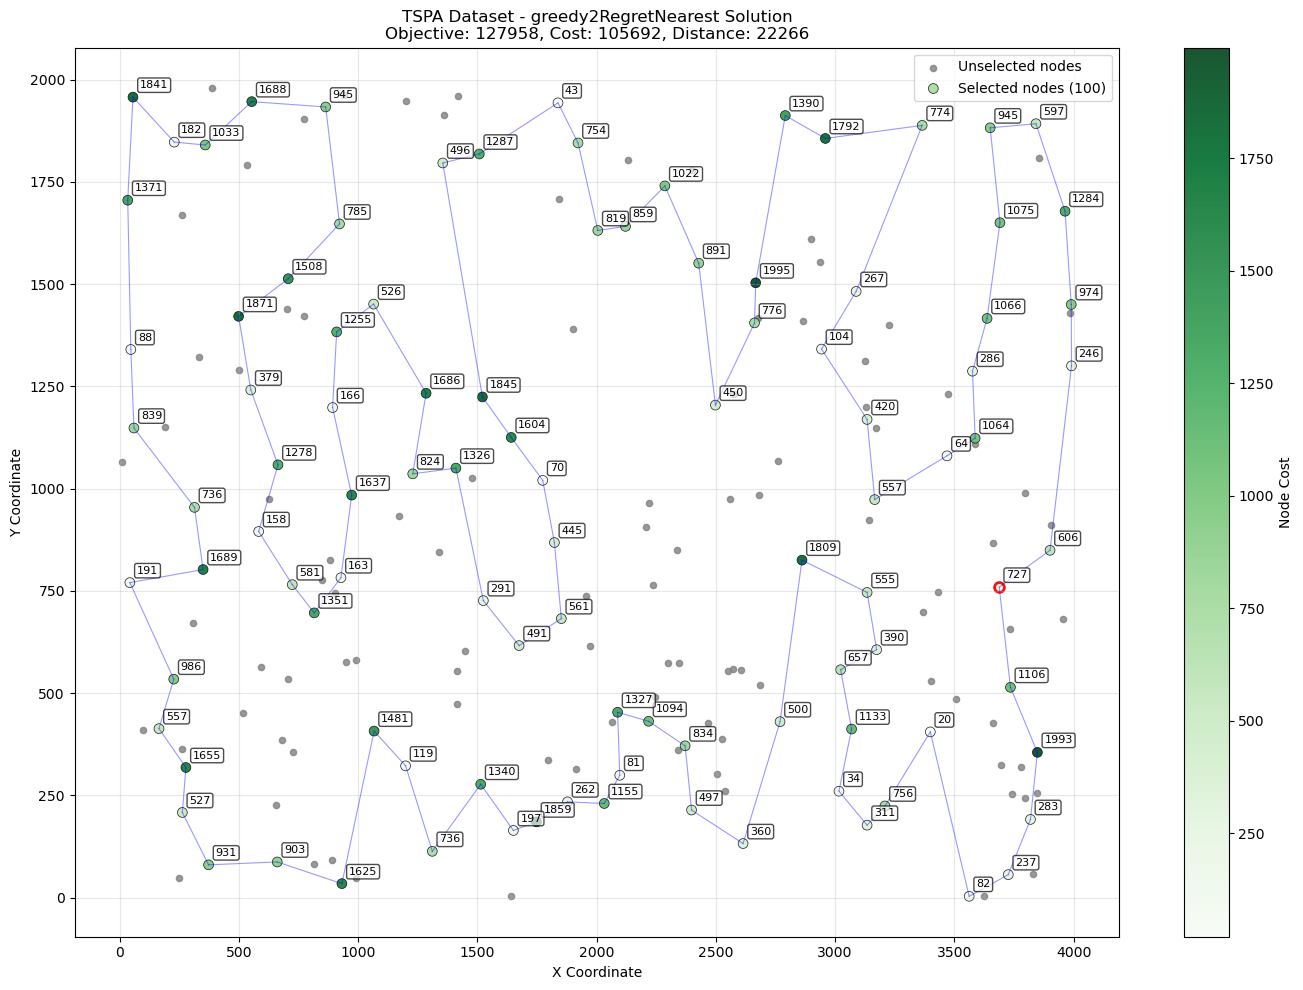

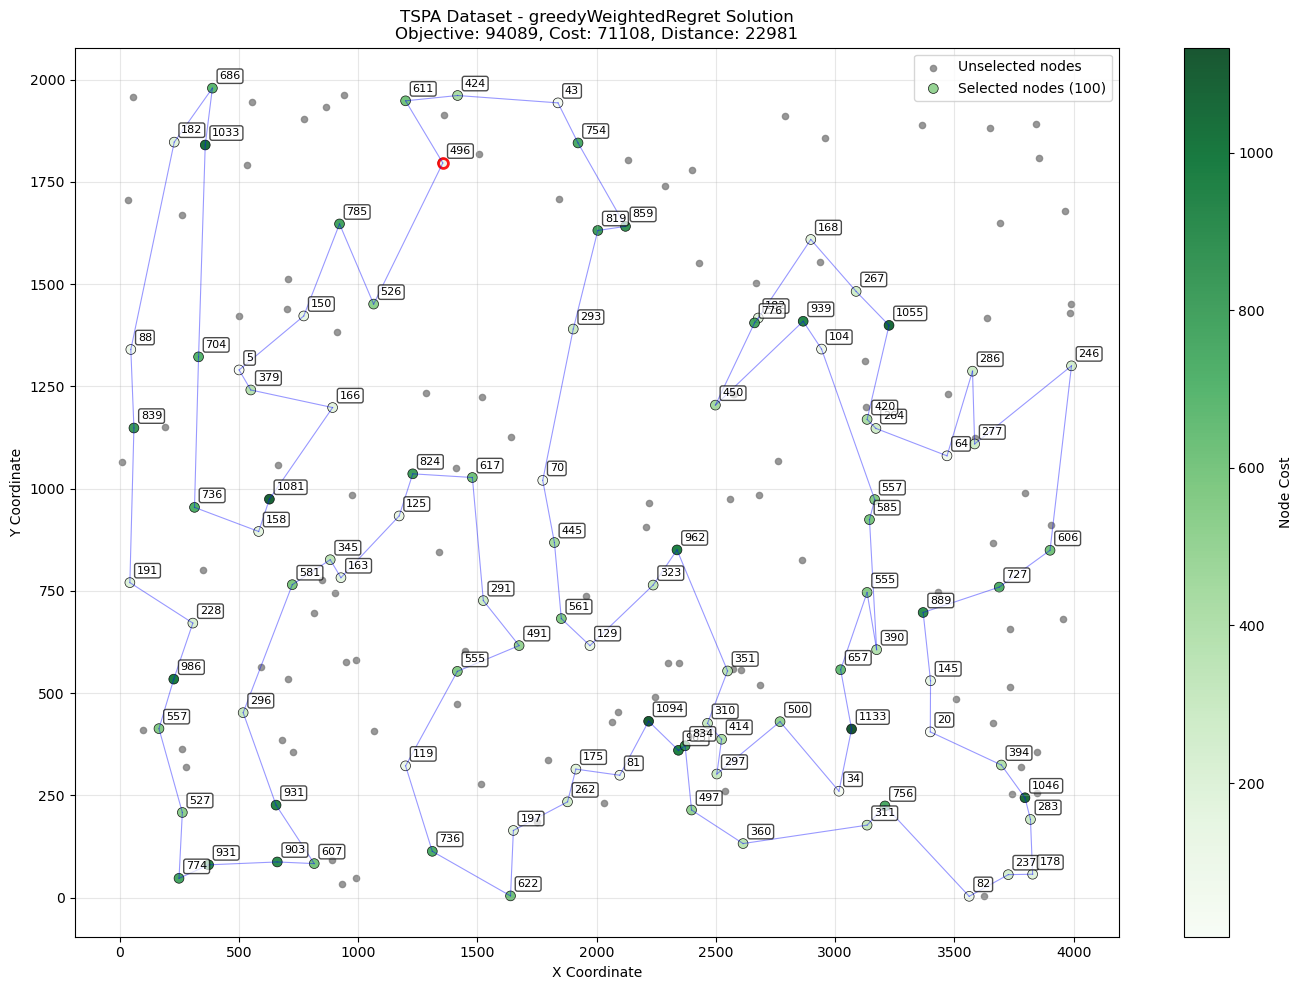

In [28]:
methods = ['RandomSolution', 'NearestNeighborEndOnly', 'NearestNeighborAllPositions', 'GreedyCycle', 'greedy2RegretNearest', 'greedyWeightedRegret']
for i, method in enumerate(methods):
    best_solution = solutions_A[solutions_A.index == i].iloc[0]
    plot_solution('TSPA', method, best_solution)

# Instance B

In [29]:
experiment_summary_b_greedy = pd.read_csv("../Results/GreedyHeuristics/TSPB/experiment_summary.csv")
experiment_summary_b_greedy_regret = pd.read_csv("../Results/GreedyRegretHeuristics/TSPB/experiment_summary.csv")

In [30]:
experiment_summary_b_greedy

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPB,RandomSolution,193882,243501,214649.94,200,21
1,TSPB,NearestNeighborEndOnly,63474,77453,70031.29,200,131
2,TSPB,NearestNeighborAllPositions,49394,57324,51520.14,200,25
3,TSPB,GreedyCycle,49001,57324,51306.66,200,94


In [31]:
experiment_summary_b_greedy_regret

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPB,greedy2RegretNearest,67809,78406,72712.85,200,19
1,TSPB,greedyWeightedRegret,47144,55700,50934.60,200,200


In [32]:
experiment_summary_b_combined = pd.concat([experiment_summary_b_greedy, experiment_summary_b_greedy_regret], ignore_index=True)
experiment_summary_b_combined

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPB,RandomSolution,193882,243501,214649.94,200,21
1,TSPB,NearestNeighborEndOnly,63474,77453,70031.29,200,131
2,TSPB,NearestNeighborAllPositions,49394,57324,51520.14,200,25
3,TSPB,GreedyCycle,49001,57324,51306.66,200,94
4,TSPB,greedy2RegretNearest,67809,78406,72712.85,200,19
5,TSPB,greedyWeightedRegret,47144,55700,50934.60,200,200


In [33]:
solutions_B = pd.DataFrame()
for method in experiment_summary_b_combined['Method'].unique():
    method_data = experiment_summary_b_combined[experiment_summary_b_combined['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution("TSPB", method, best_solution_id)
    solutions_B = pd.concat([solutions_B, solution], ignore_index=True)

solutions_B

RandomSolution: Best Solution ID = 21
NearestNeighborEndOnly: Best Solution ID = 131
NearestNeighborAllPositions: Best Solution ID = 25
GreedyCycle: Best Solution ID = 94
greedy2RegretNearest: Best Solution ID = 19
greedyWeightedRegret: Best Solution ID = 200


,SolutionID,TotalCost,NumNodes,TotalDistance,ObjectiveFunction,Cycle
0,21,193882,100,147664,341546,153-122-157-175-37-110-22-104-125-117-102-75-1...
1,131,63474,100,26751,90225,87-21-8-82-77-141-36-61-177-5-175-78-142-45-25...
2,25,49394,100,21169,70563,142-45-5-177-25-104-138-182-139-168-195-145-15...
3,94,49001,100,20856,69857,85-51-121-131-135-63-122-133-10-90-191-147-6-1...
4,19,67809,100,21430,89239,18-34-174-183-9-99-185-179-172-57-66-47-60-20-...
5,200,47144,100,21152,68296,199-183-140-95-130-99-22-179-185-86-166-194-11...


In [34]:
coords = tspb_raw_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)

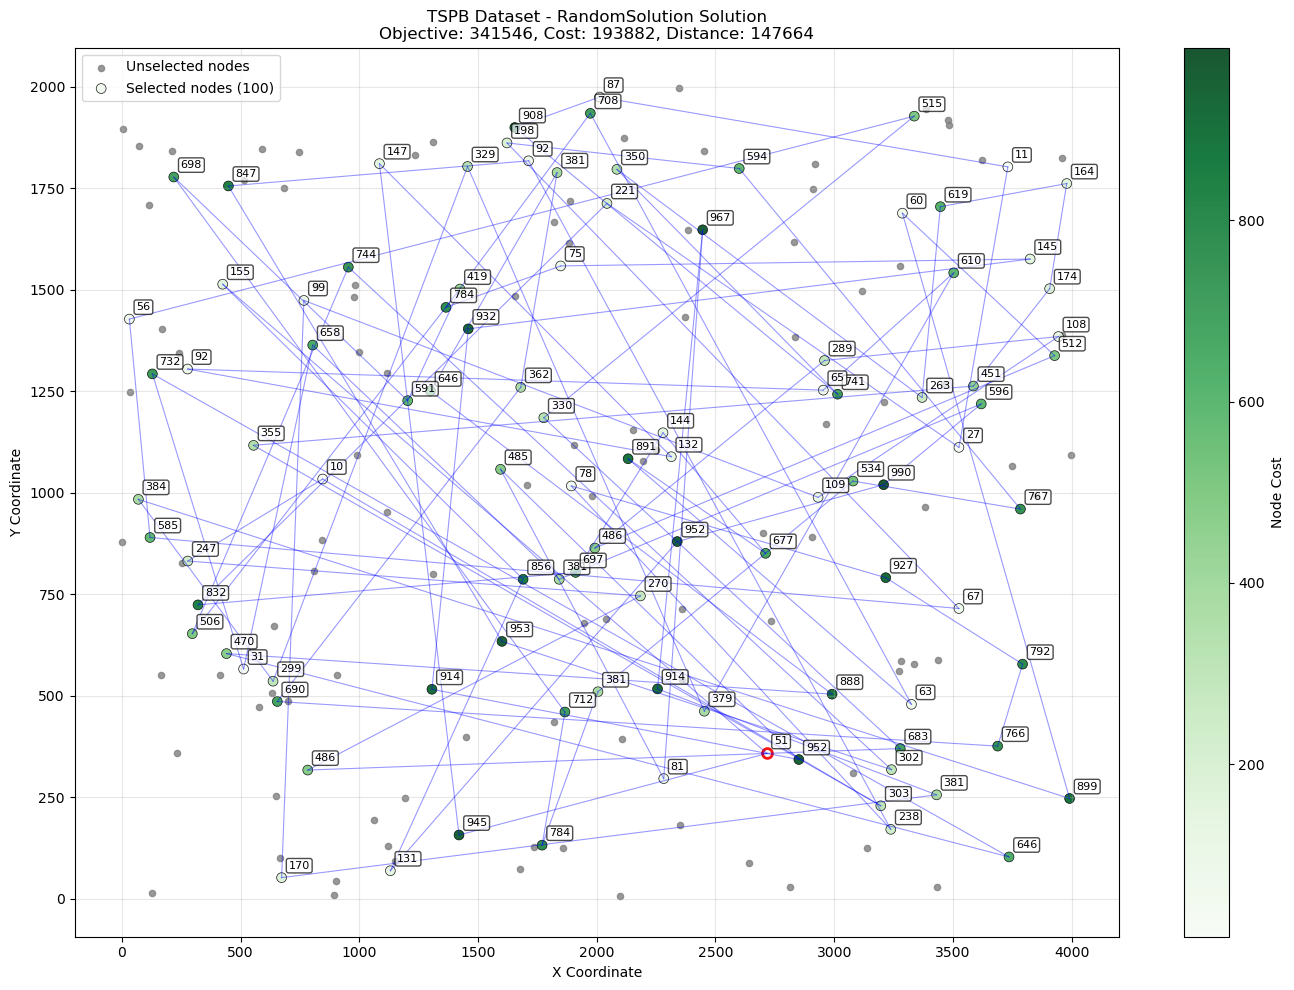

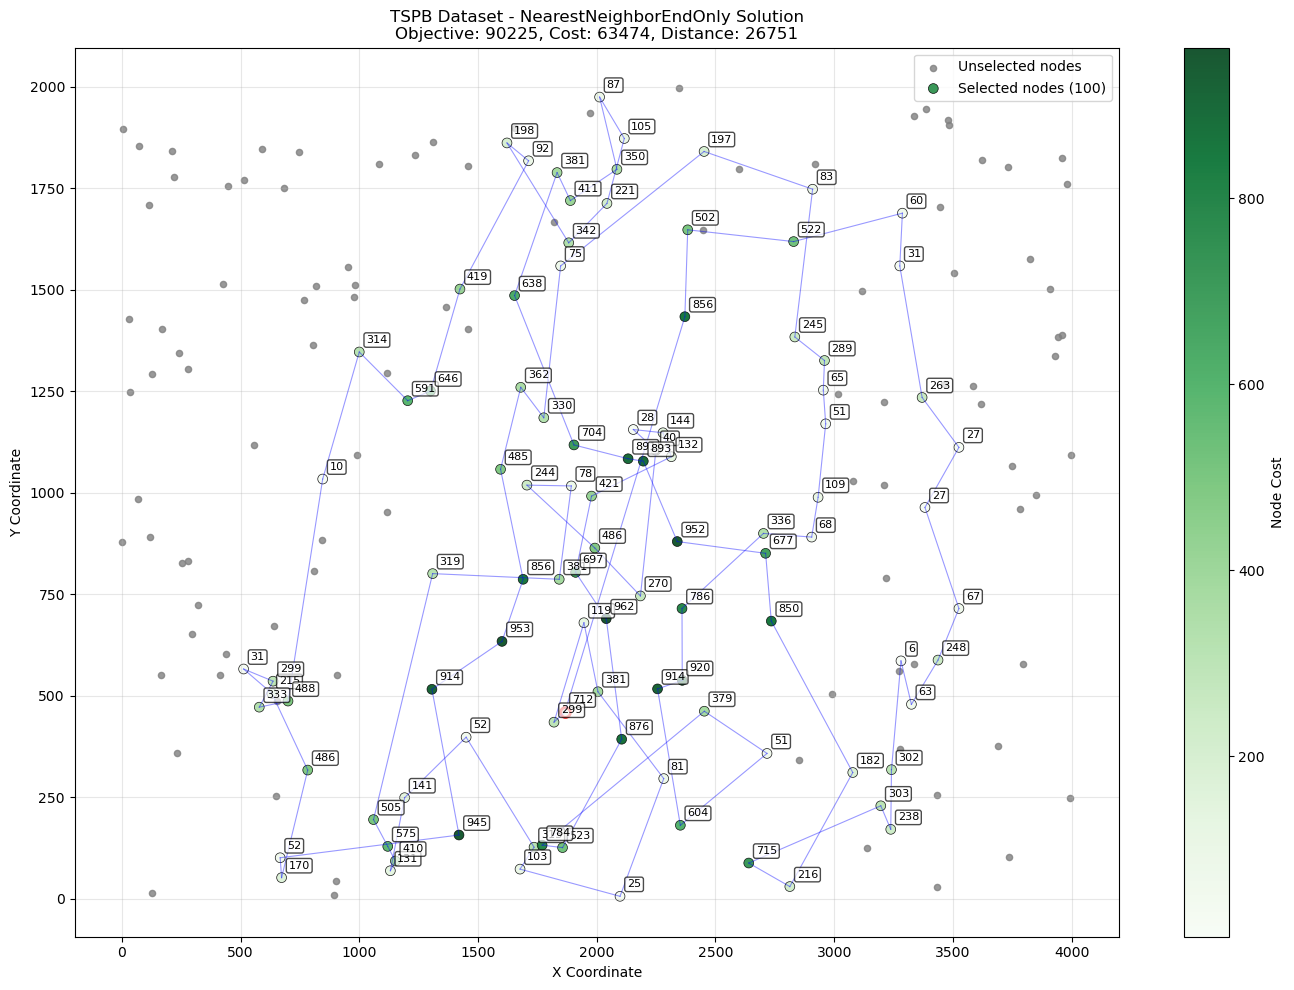

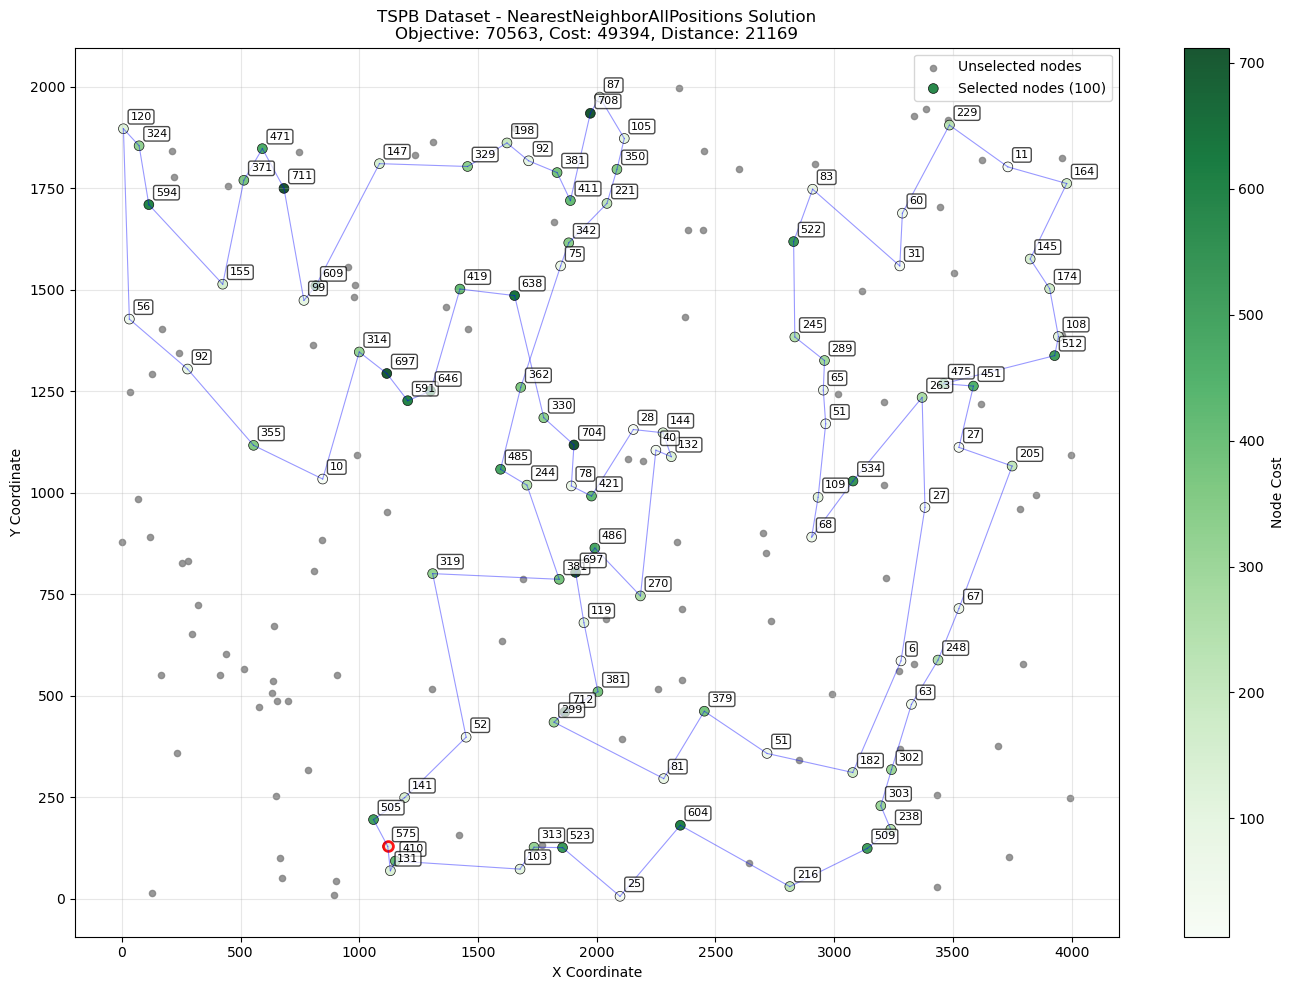

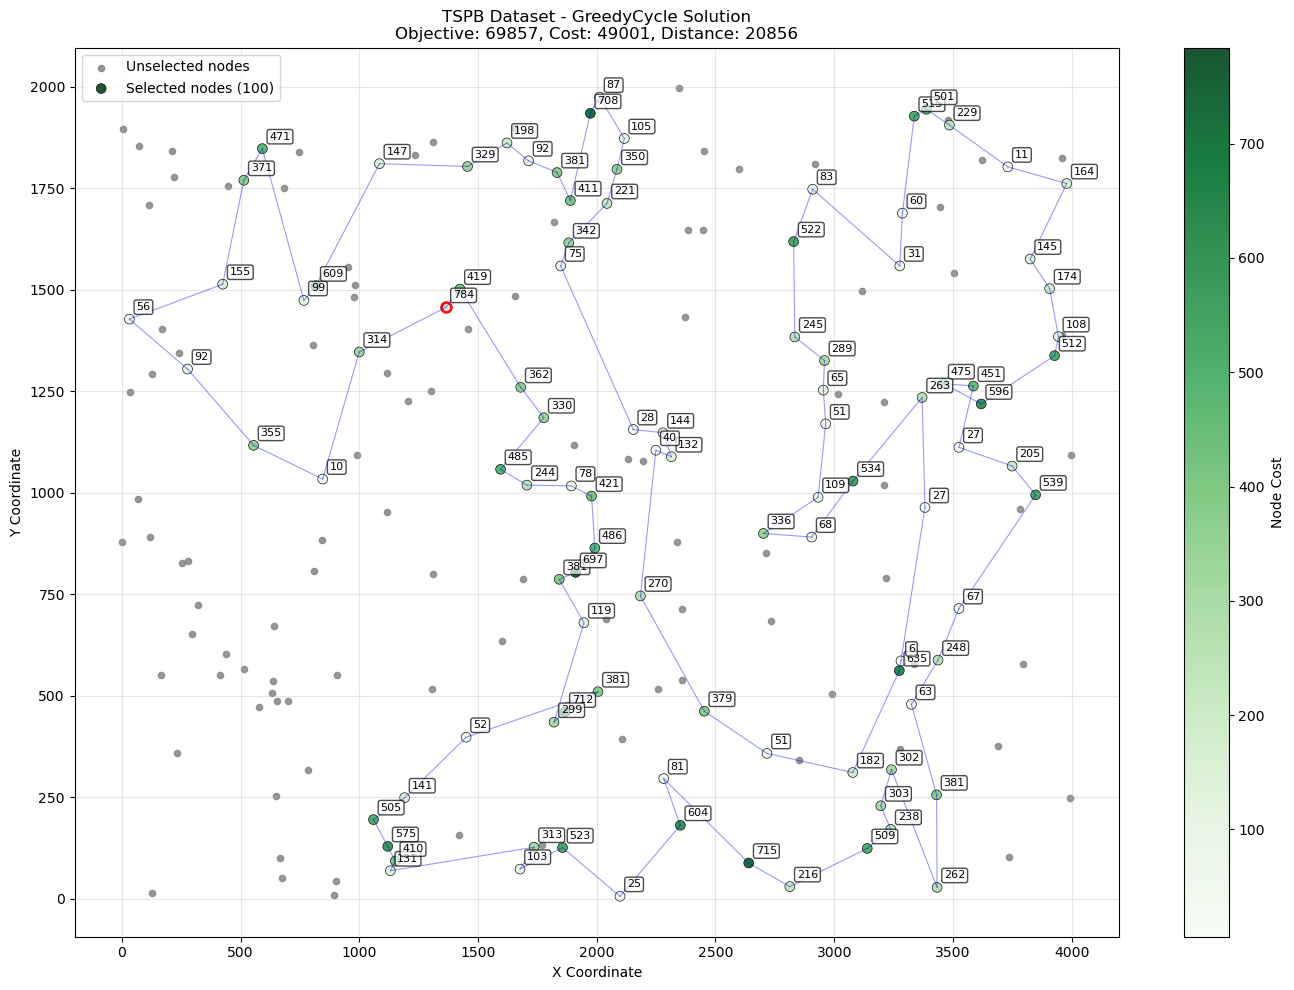

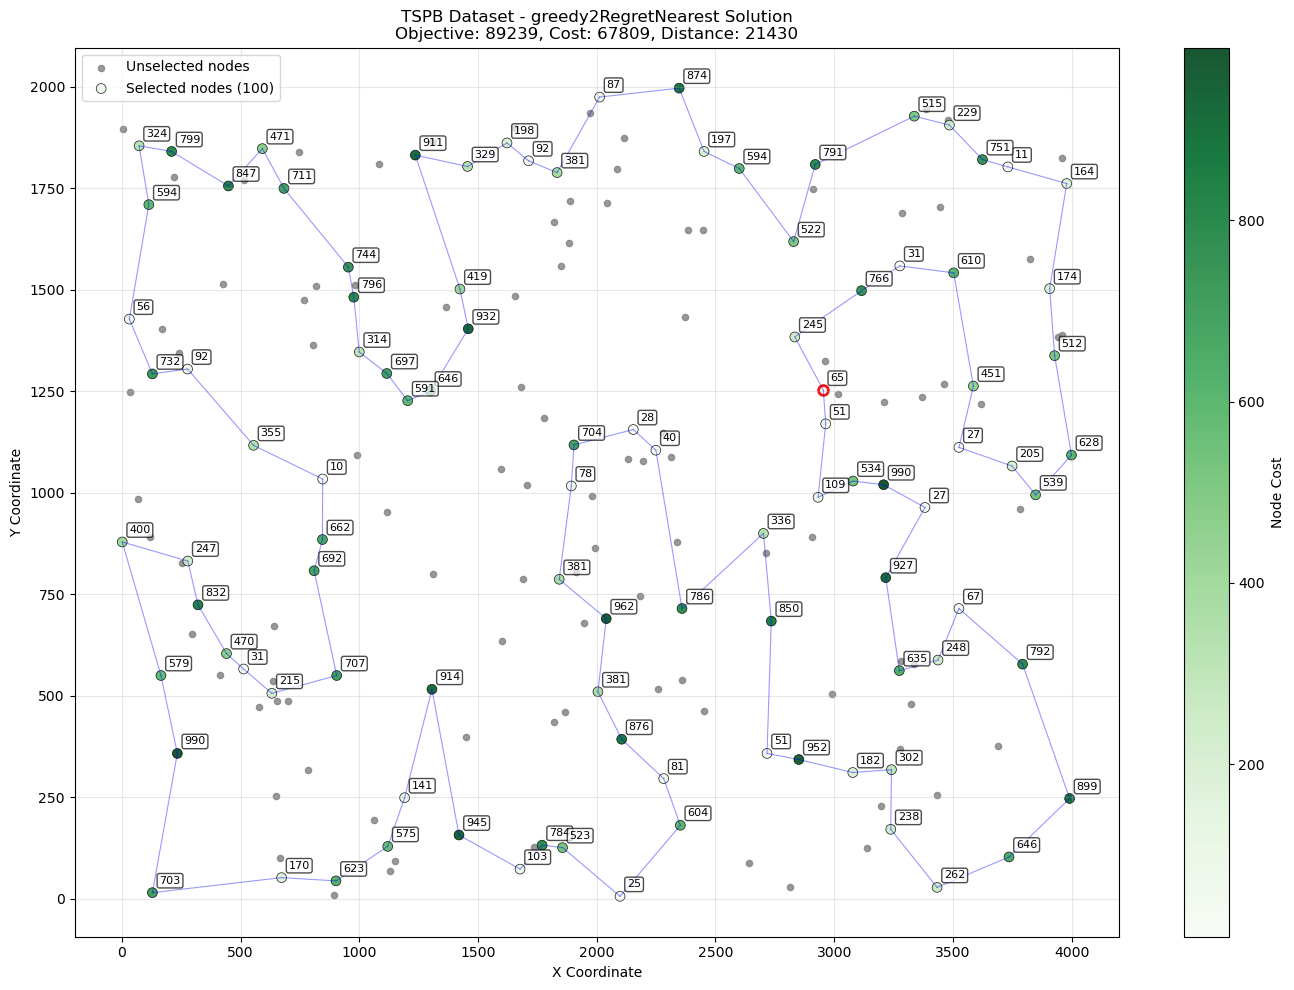

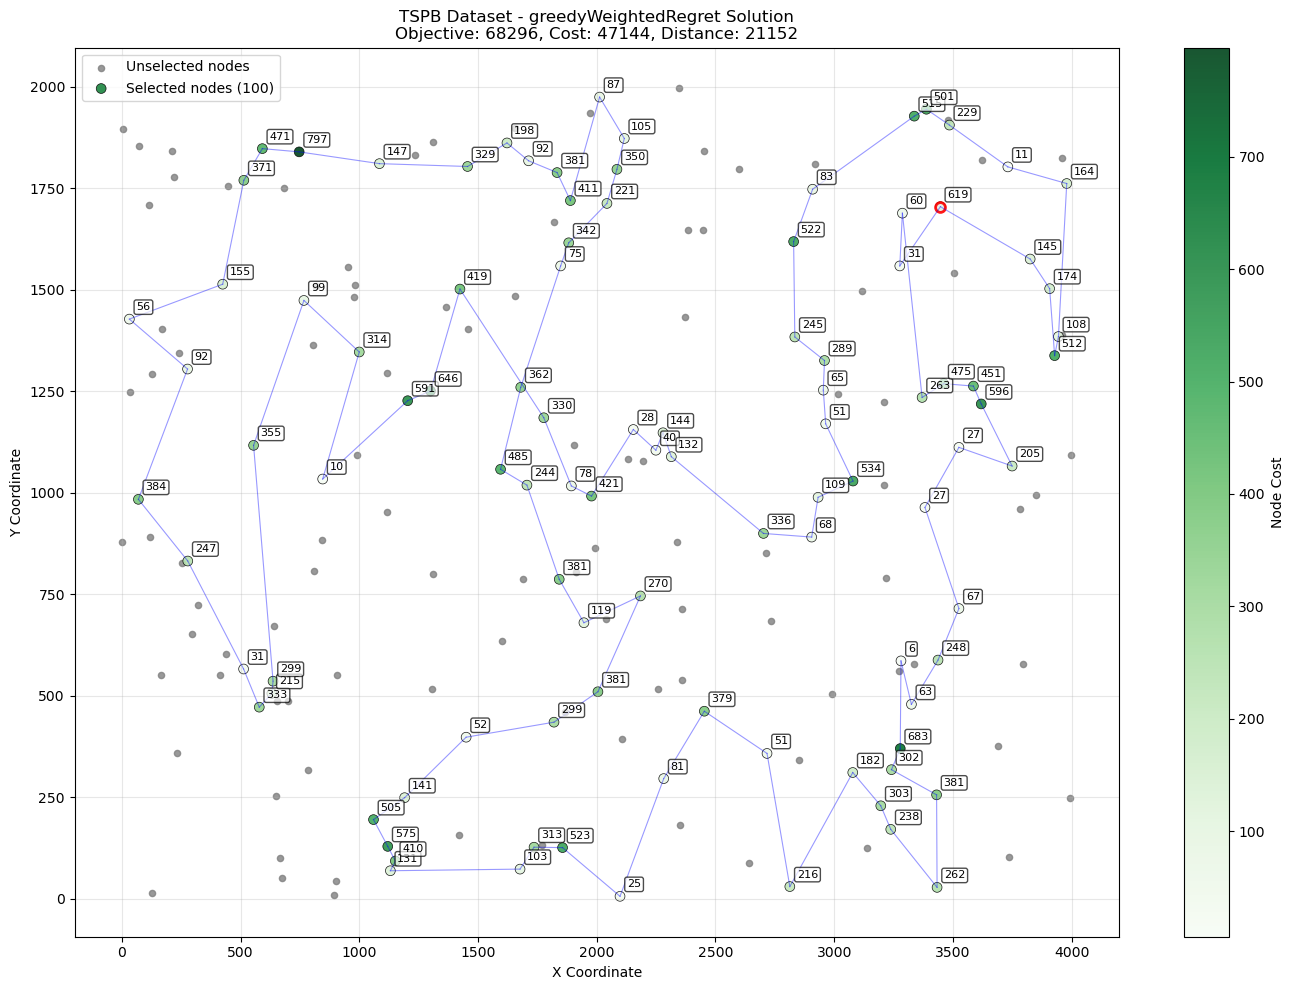

In [35]:
methods = ['RandomSolution', 'NearestNeighborEndOnly', 'NearestNeighborAllPositions', 'GreedyCycle', 'greedy2RegretNearest', 'greedyWeightedRegret']
for i, method in enumerate(methods):
    best_solution = solutions_B[solutions_B.index == i].iloc[0]
    plot_solution('TSPB', method, best_solution)

In [39]:
# Create enhanced comparison table for both instances
comparison_data = []

# Add Instance A data
for i, method in enumerate(methods):
    solution_a = solutions_A.iloc[i]
    summary_a = experiment_summary_a_combined[experiment_summary_a_combined['Method'] == method].iloc[0]
    comparison_data.append({
        'Instance': 'TSPA',
        'Method': method,
        'ObjectiveFunction': solution_a['ObjectiveFunction'],
        'TotalDistance': solution_a['TotalDistance'],
        'TotalCost': solution_a['TotalCost'],
        'MinCost': summary_a['MinCost'],
        'MaxCost': summary_a['MaxCost'],
        'AvgCost': summary_a['AvgCost']
    })

# Add Instance B data
for i, method in enumerate(methods):
    solution_b = solutions_B.iloc[i]
    summary_b = experiment_summary_b_combined[experiment_summary_b_combined['Method'] == method].iloc[0]
    comparison_data.append({
        'Instance': 'TSPB',
        'Method': method,
        'ObjectiveFunction': solution_b['ObjectiveFunction'],
        'TotalDistance': solution_b['TotalDistance'],
        'TotalCost': solution_b['TotalCost'],
        'MinCost': summary_b['MinCost'],
        'MaxCost': summary_b['MaxCost'],
        'AvgCost': summary_b['AvgCost']
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Create a fancy formatted table
print("=" * 120)
print(f"{'TSP ALGORITHM PERFORMANCE COMPARISON':^120}")
print("=" * 120)

for instance in ['TSPA', 'TSPB']:
    instance_data = comparison_df[comparison_df['Instance'] == instance]
    print(f"\n{f'INSTANCE {instance}':^120}")
    print("-" * 120)
    print(f"{'Method':<25} {'Best Obj':<12} {'Best Dist':<12} {'Best Cost':<12} {'Min Cost':<12} {'Max Cost':<12} {'Avg Cost':<12}")
    print("-" * 120)
    
    for _, row in instance_data.iterrows():
        print(f"{row['Method']:<25} {row['ObjectiveFunction']:<12} {row['TotalDistance']:<12} {row['TotalCost']:<12} "
              f"{row['MinCost']:<12} {row['MaxCost']:<12} {row['AvgCost']:<12.2f}")
    
    print("-" * 120)

print("\n" + "=" * 120)

                                          TSP ALGORITHM PERFORMANCE COMPARISON                                          

                                                     INSTANCE TSPA                                                      
------------------------------------------------------------------------------------------------------------------------
Method                    Best Obj     Best Dist    Best Cost    Min Cost     Max Cost     Avg Cost    
------------------------------------------------------------------------------------------------------------------------
RandomSolution            365380       139003       226377       226377       288217       264499.24   
NearestNeighborEndOnly    121165       31967        89198        89198        120393       103411.57   
NearestNeighborAllPositions 95066        23578        71488        71488        74410        72653.55    
GreedyCycle               95724        24005        71719        71719        74410        72721.